In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys

import numpy as np
import pandas as pd

sys.path.insert(0, '..')
import ccal

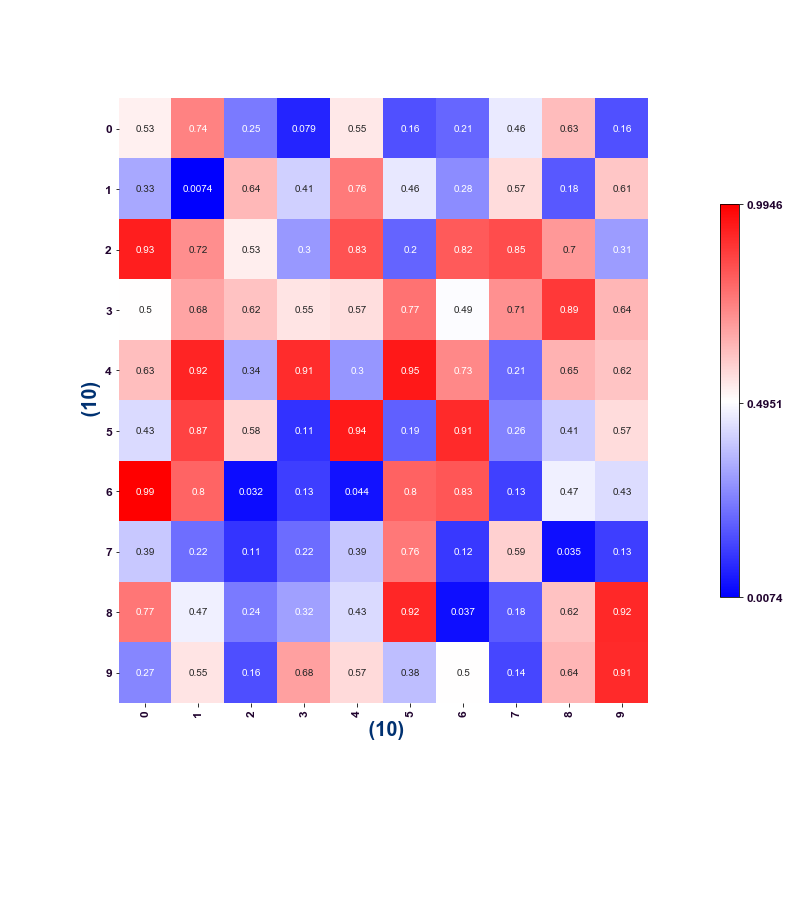

In [3]:
df = pd.DataFrame(np.random.random_sample((10, 10)))

ccal.plot_heatmap(df)

In [4]:
# List ccal attributes

dir(ccal)

['GPSMap',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'apply_function_on_2_1d_arrays_and_compute_empirical_p_value',
 'apply_function_on_2_2d_arrays_slices',
 'assign_colors',
 'cluster',
 'cluster_2d_array_rows',
 'cluster_2d_array_slices_by_group',
 'compute_1d_array_cumulative_sum',
 'compute_brier_entropy',
 'compute_empirical_p_value',
 'compute_empirical_p_values_and_fdrs',
 'compute_entropy',
 'compute_gene_scores',
 'compute_information_coefficient',
 'compute_information_distance',
 'compute_log_ratios',
 'compute_margin_of_error',
 'count_coclustering_and_normalize',
 'decorate_ax',
 'define_exponential_function',
 'drop_nan_and_apply_function_on_2_1d_arrays',
 'dump_gpsmap',
 'explore_components',
 'explore_states',
 'file',
 'fit_function_on_each_2d_array_slice',
 'geo',
 'get_1d_array_unique_objects_in_order',
 'get_and_parse_geo_data',
 'get_ax_positions',
 'get_coordinates_for_reflection

In [5]:
ccal.explore_components

<function ccal.cluster.cluster.nmf_consensus_cluster_with_multiple_k.nmf_consensus_cluster_with_multiple_k>

In [6]:
ccal.explore_states

<function ccal.cluster.cluster.hierarchical_consensus_cluster_with_multiple_k.hierarchical_consensus_cluster_with_multiple_k>